C:\Users\User\AppData\Local\Temp\ipykernel_20004\313663157.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_100['DECADE'] = (df_last_100['YEAR'] // 10) * 10


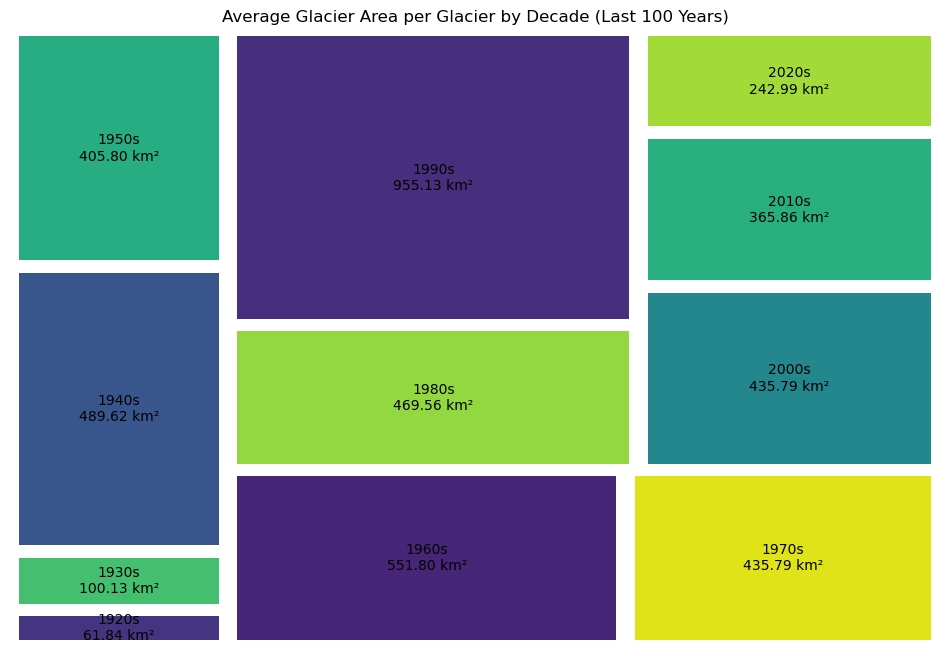

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify  # Treemap library

# Load and clean the dataset
df = pd.read_csv('mass_balance.csv', sep=',')
df.columns = df.columns.str.strip()
df = df.dropna(subset=['YEAR', 'AREA'])

# Convert YEAR to integer
df['YEAR'] = df['YEAR'].astype(int)

# Filter to the last 100 years from the most recent year
latest_year = df['YEAR'].max()
df_last_100 = df[df['YEAR'] >= latest_year - 100]

# Create DECADE column
df_last_100['DECADE'] = (df_last_100['YEAR'] // 10) * 10

# Compute average glacier size per decade
avg_area_by_decade = df_last_100.groupby('DECADE').agg(
    total_area=('AREA', 'sum'),
    glacier_count=('NAME', 'nunique')  # Use NAME or WGMS_ID as glacier ID
).reset_index()

avg_area_by_decade['avg_glacier_area'] = avg_area_by_decade['total_area'] / avg_area_by_decade['glacier_count']

# Sort by decade
avg_area_by_decade = avg_area_by_decade.sort_values(by='DECADE')

# Prepare labels and values
labels = [f"{int(row['DECADE'])}s\n{row['avg_glacier_area']:.2f} km²" for _, row in avg_area_by_decade.iterrows()]
sizes = avg_area_by_decade['avg_glacier_area']

# Plot treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, pad=True)
plt.title("Average Glacier Area per Glacier by Decade (Last 100 Years)")
plt.axis('off')
plt.show()
